<a href="https://colab.research.google.com/github/youngyoung0511/Sound-AI/blob/Data-processing/1014_%EC%A3%BC%ED%8C%8C%EC%88%98%EB%B3%80%ED%99%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 로드

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/content/drive/My Drive/soundAI/sliced/

미드탐(09): 0009_16cut_13_slice.wav

로우탐(10): 0010_2_152_slice.wav

킥드럼(11): 0011c_caco_drums_chunk0132_slice.wav

스네어드럼(06): 0006c_you_drums_chunk0012_slice.wav

In [ ]:
import librosa

미드탐 mt

In [ ]:
# 경로 설정
file_path = '/content/drive/My Drive/soundAI/sliced/0009_16cut_13_slice.wav'

# librosa로 오디오 파일 로드
mt, sr = librosa.load(file_path, sr=None)

# mt 변수에 데이터가 로드되었는지 확인
print(f"Audio data loaded into 'mt'. Sample rate: {sr}, Length of audio: {len(mt)} samples")


Audio data loaded into 'mt'. Sample rate: 48000, Length of audio: 2400 samples


로우탐 ft

In [ ]:
# 경로 설정
file_path = '/content/drive/My Drive/soundAI/sliced/0010_2_152_slice.wav'

# librosa로 오디오 파일 로드
ft, sr = librosa.load(file_path, sr=None)

# ft 변수에 데이터가 로드되었는지 확인
print(f"Audio data loaded into 'ft'. Sample rate: {sr}, Length of audio: {len(mt)} samples")

Audio data loaded into 'ft'. Sample rate: 48000, Length of audio: 2400 samples


킥드럼 kd

In [ ]:

# 경로 설정
file_path = '/content/drive/My Drive/soundAI/sliced/0011c_caco_drums_chunk0132_slice.wav'

# librosa로 오디오 파일 로드
kd, sr = librosa.load(file_path, sr=None)

# ft 변수에 데이터가 로드되었는지 확인
print(f"Audio data loaded into 'kd'. Sample rate: {sr}, Length of audio: {len(mt)} samples")

Audio data loaded into 'kd'. Sample rate: 44100, Length of audio: 2400 samples


스네어 드럼 sd

In [ ]:
# 경로 설정
file_path = '/content/drive/My Drive/soundAI/sliced/0006c_you_drums_chunk0012_slice.wav'

# librosa로 오디오 파일 로드
sd, sr = librosa.load(file_path, sr=None)

# ft 변수에 데이터가 로드되었는지 확인
print(f"Audio data loaded into 'sd'. Sample rate: {sr}, Length of audio: {len(mt)} samples")

Audio data loaded into 'sd'. Sample rate: 44100, Length of audio: 2400 samples


오디오 파일 시각화

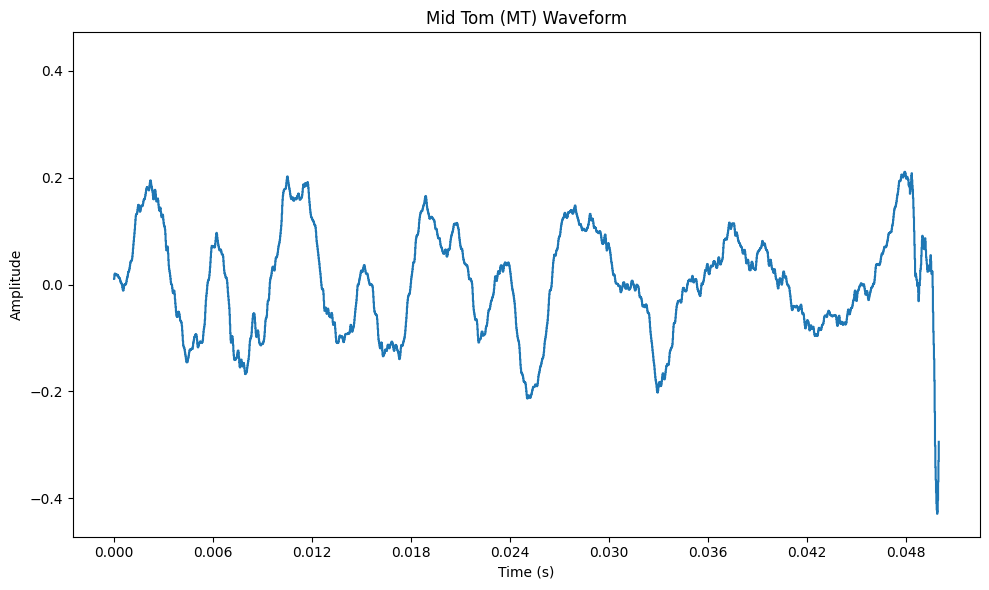

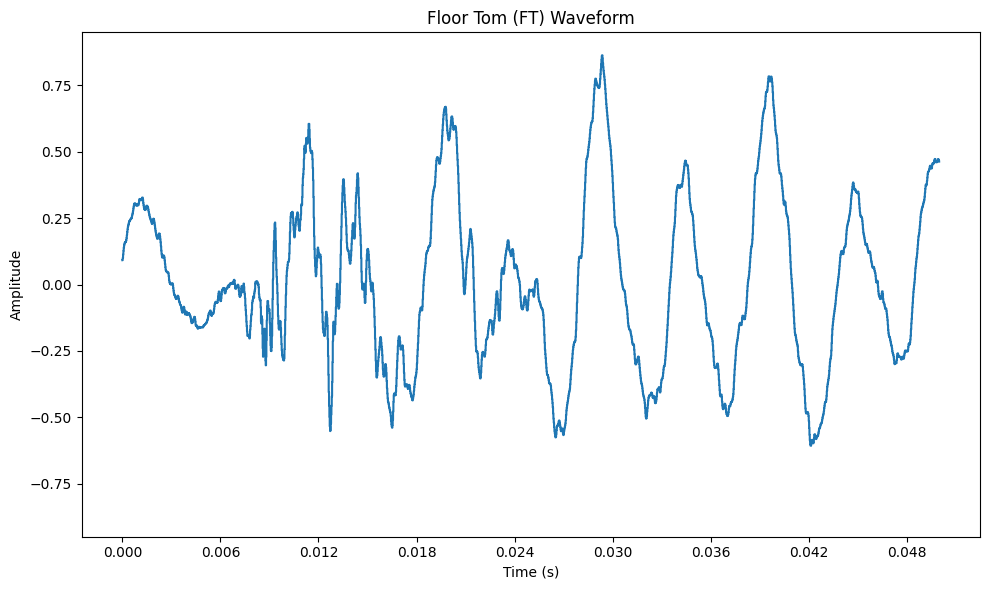

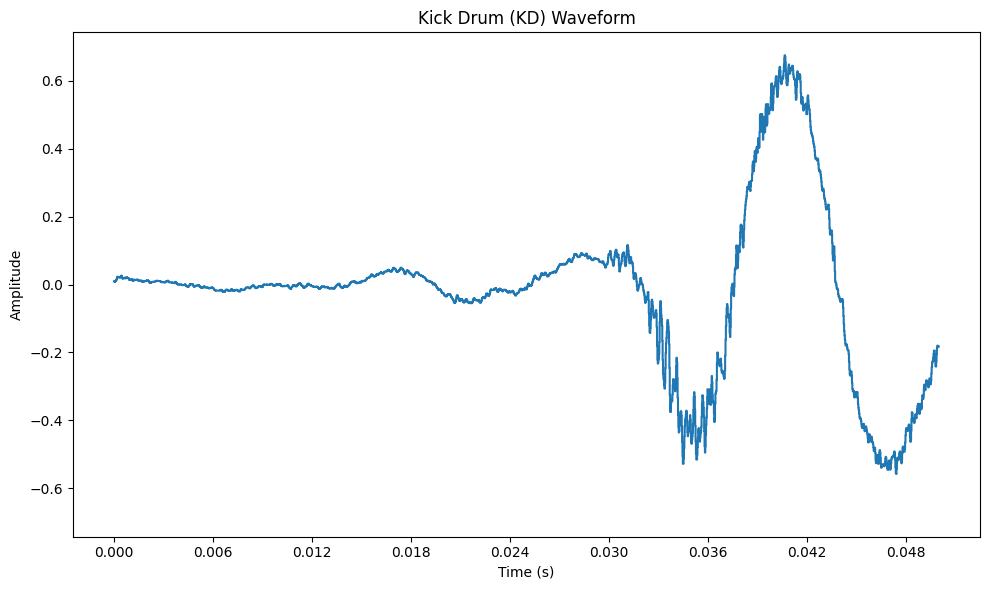

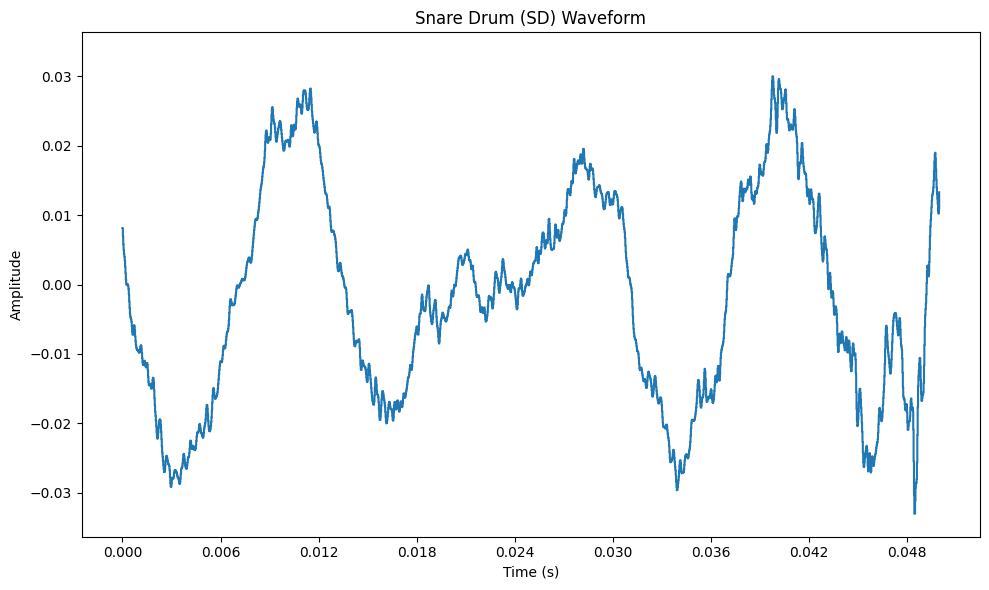

In [ ]:
# 각 오디오 파일에 대한 파형을 시각화하는 함수
def plot_waveform(audio_data, sr, title):
    plt.figure(figsize=(10, 6))
    librosa.display.waveshow(audio_data, sr=sr)
    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()

# 미드탐과 로우탐은 48000 Hz
plot_waveform(mt, sr=48000, title="Mid Tom (MT) Waveform")
plot_waveform(ft, sr=48000, title="Floor Tom (FT) Waveform")

# 킥드럼과 스네어 드럼은 44100 Hz
plot_waveform(kd, sr=44100, title="Kick Drum (KD) Waveform")
plot_waveform(sd, sr=44100, title="Snare Drum (SD) Waveform")


# stft 변환

각각에 stft 적용

mt와 ft의 sample rate가 48000이고 kd와 sd는 44100

mt와 ft는 샘플링 레이트 높음 / 큰 창 사용해서 / 더 높은 주파수 해상도 얻음

sd와 kd는 샘플링 레이트가 낮음 / 창 크기 줄임

In [ ]:
import librosa

# 샘플링 레이트에 따른 창 크기와 홉 크기 설정
n_fft_48000 = 4096  # 주파수 해상도를 높이기 위해 n_fft 값을 4096으로 설정
hop_length_48000 = 128  # 홉 크기를 더 줄여 시간 프레임 수를 증가시킴

n_fft_44100 = 4096  # 동일하게 주파수 해상도를 유지
hop_length_44100 = 128  # 홉 크기 감소

# STFT 변환 함수
def apply_stft(audio_data, n_fft, hop_length):
    return librosa.stft(audio_data, n_fft=n_fft, hop_length=hop_length)

# 미드탐(mt)과 로우탐(ft)에 48000Hz용 창 크기 적용
mt_stft = apply_stft(mt, n_fft=n_fft_48000, hop_length=hop_length_48000)
ft_stft = apply_stft(ft, n_fft=n_fft_48000, hop_length=hop_length_48000)

# 킥드럼(kd)과 스네어 드럼(sd)에 44100Hz용 창 크기 적용
kd_stft = apply_stft(kd, n_fft=n_fft_44100, hop_length=hop_length_44100)
sd_stft = apply_stft(sd, n_fft=n_fft_44100, hop_length=hop_length_44100)

# 결과 확인 (크기 출력)
print(f"MT STFT shape: {mt_stft.shape}")
print(f"FT STFT shape: {ft_stft.shape}")
print(f"KD STFT shape: {kd_stft.shape}")
print(f"SD STFT shape: {sd_stft.shape}")


MT STFT shape: (2049, 19)
FT STFT shape: (2049, 19)
KD STFT shape: (2049, 18)
SD STFT shape: (2049, 18)


mt_stft

ft_stft

kd_stft

sd_stft

stft 변환한 후 시각화

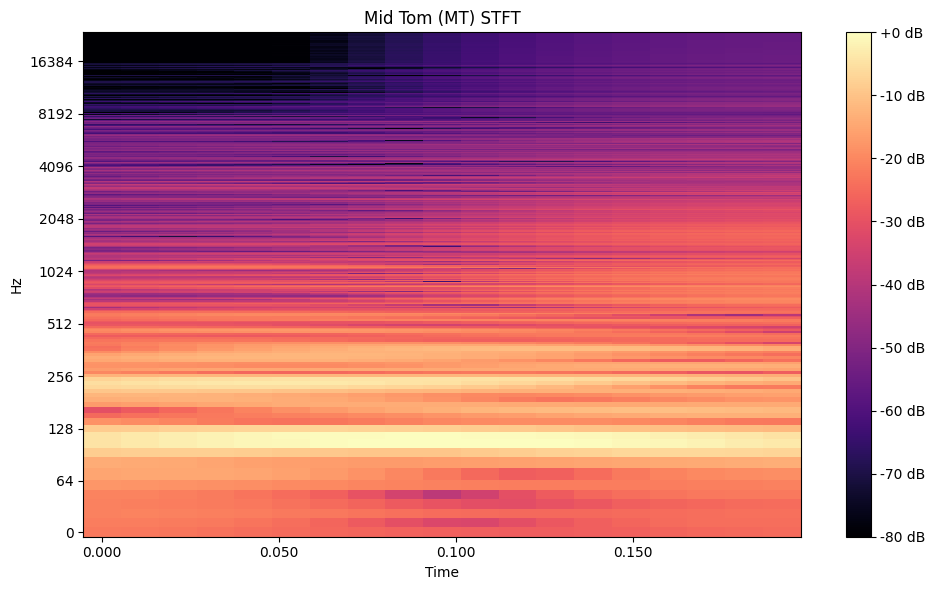

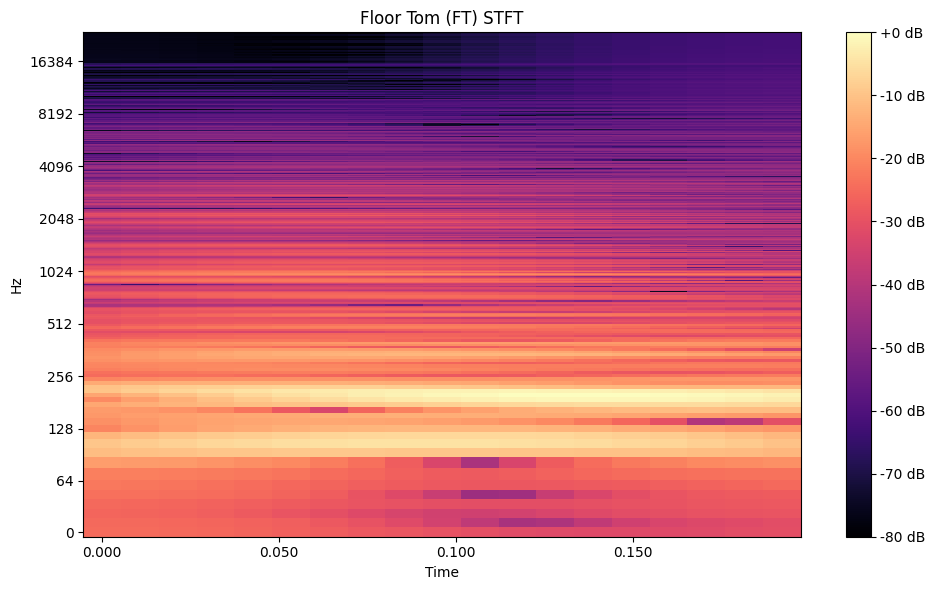

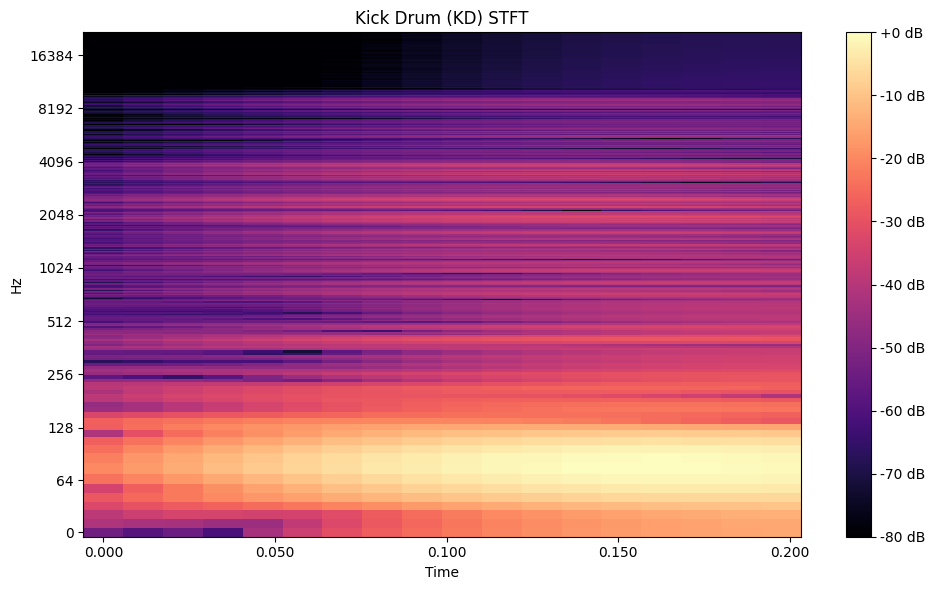

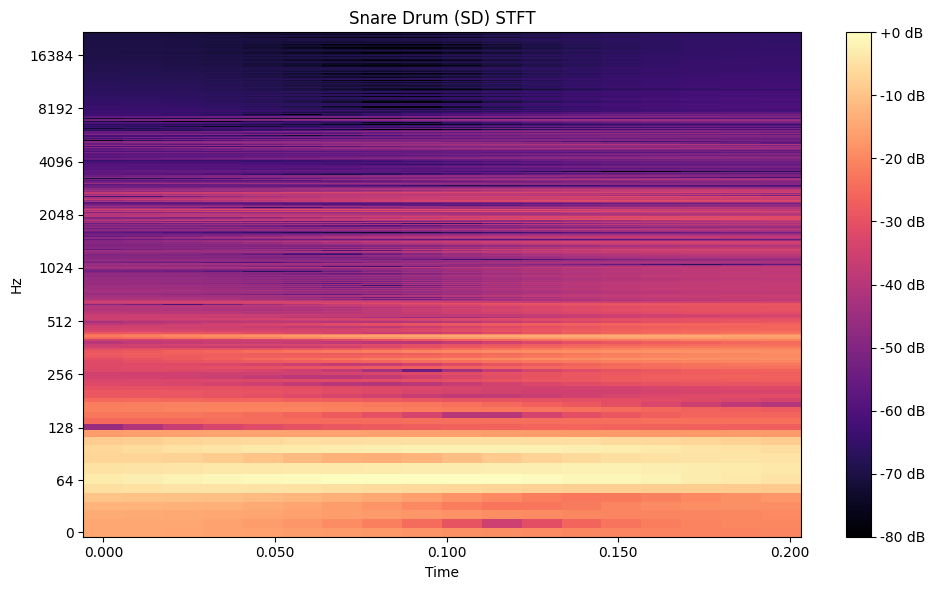

In [ ]:
import librosa.display
import matplotlib.pyplot as plt

# STFT 변환된 데이터를 시각화하는 함수
def plot_stft(stft_data, sr, title):
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(librosa.amplitude_to_db(abs(stft_data), ref=np.max), sr=sr, y_axis='log', x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.tight_layout()
    plt.show()

# 미드탐과 로우탐은 48000 Hz
plot_stft(mt_stft, sr=48000, title="Mid Tom (MT) STFT")
plot_stft(ft_stft, sr=48000, title="Floor Tom (FT) STFT")

# 킥드럼과 스네어 드럼은 44100 Hz
plot_stft(kd_stft, sr=44100, title="Kick Drum (KD) STFT")
plot_stft(sd_stft, sr=44100, title="Snare Drum (SD) STFT")

torch.linalg.norm(A - B)를 사용하여 STFT 변환 값들을 비교

값이 작으면 두 음이 유사하다는 뜻.

In [ ]:
import torch
import numpy as np

In [ ]:
# 절대값을 사용하여 STFT 데이터를 비교
mt_abs = np.abs(mt_stft)
ft_abs = np.abs(ft_stft)
kd_abs = np.abs(kd_stft)
sd_abs = np.abs(sd_stft)

mt, ft / kd,sd 의 샘플링 레이트가 달라서 크기를 일치 시켜줘야함.

In [ ]:
# 작은 크기에 맞춰서 행렬 자르기
min_rows = min(mt_abs.shape[0], kd_abs.shape[0], sd_abs.shape[0])
min_cols = min(mt_abs.shape[1], kd_abs.shape[1], sd_abs.shape[1])

In [ ]:
mt_abs = mt_abs[:min_rows, :min_cols]
ft_abs = ft_abs[:min_rows, :min_cols]
kd_abs = kd_abs[:min_rows, :min_cols]
sd_abs = sd_abs[:min_rows, :min_cols]

In [ ]:
# 1) 미드탐과 로우탐
mt_ft_diff = np.linalg.norm(mt_abs - ft_abs)

# 2) 킥드럼과 스네어드럼
kd_sd_diff = np.linalg.norm(kd_abs - sd_abs)

# 3) 미드탐과 킥드럼
mt_kd_diff = np.linalg.norm(mt_abs - kd_abs)

# 4) 미드탐과 스네어드럼
mt_sd_diff = np.linalg.norm(mt_abs - sd_abs)

# 5) 로우탐과 킥드럼
ft_kd_diff = np.linalg.norm(ft_abs - kd_abs)

# 6) 로우탐과 스네어드럼
ft_sd_diff = np.linalg.norm(ft_abs - sd_abs)


In [ ]:
diffs = {
    "Mid Tom과 Floor Tom": mt_ft_diff,
    "Kick Drum과 Snare Drum": kd_sd_diff,
    "Mid Tom과 Kick Drum": mt_kd_diff,
    "Mid Tom과 Snare Drum": mt_sd_diff,
    "Floor Tom과 Kick Drum": ft_kd_diff,
    "Floor Tom과 Snare Drum": ft_sd_diff
}

diffs

{'Mid Tom과 Floor Tom': 1777.385,
 'Kick Drum과 Snare Drum': 1400.9086,
 'Mid Tom과 Kick Drum': 1268.4877,
 'Mid Tom과 Snare Drum': 610.97986,
 'Floor Tom과 Kick Drum': 2129.548,
 'Floor Tom과 Snare Drum': 2139.422}

norm이 작으면 주파수 영역에서 두 소리가 유사하다는 뜻.

대부분 상대적으로 크다는 것을 알 수 있음.

# CWT 변환

CWT 변

In [ ]:
pip install PyWavelets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 18.2 MB/s eta 0:00:00


In [ ]:
import pywt

# CWT 변환 함수
def apply_cwt(audio_data, scales, wavelet='morl'):
    coefficients, _ = pywt.cwt(audio_data, scales, wavelet)
    return np.abs(coefficients)  # 절대값 반환

# 변환 스케일 설정 (임의로 1부터 128까지 스케일 설정)
scales = np.arange(1, 129)

# CWT 변환 적용
mt_cwt = apply_cwt(mt, scales)
ft_cwt = apply_cwt(ft, scales)
kd_cwt = apply_cwt(kd, scales)
sd_cwt = apply_cwt(sd, scales)

In [ ]:
# 작은 크기에 맞춰서 행렬 자르기
min_rows = min(mt_cwt.shape[0], kd_cwt.shape[0], sd_cwt.shape[0])
min_cols = min(mt_cwt.shape[1], kd_cwt.shape[1], sd_cwt.shape[1])

mt_cwt = mt_cwt[:min_rows, :min_cols]
ft_cwt = ft_cwt[:min_rows, :min_cols]
kd_cwt = kd_cwt[:min_rows, :min_cols]
sd_cwt = sd_cwt[:min_rows, :min_cols]

In [ ]:
# Norm 비교
mt_ft_diff = np.linalg.norm(mt_cwt - ft_cwt)
kd_sd_diff = np.linalg.norm(kd_cwt - sd_cwt)
mt_kd_diff = np.linalg.norm(mt_cwt - kd_cwt)
mt_sd_diff = np.linalg.norm(mt_cwt - sd_cwt)
ft_kd_diff = np.linalg.norm(ft_cwt - kd_cwt)
ft_sd_diff = np.linalg.norm(ft_cwt - sd_cwt)

In [ ]:

# 결과 출력
diffs_cwt = {
    "Mid Tom과 Floor Tom": mt_ft_diff,
    "Kick Drum과 Snare Drum": kd_sd_diff,
    "Mid Tom과 Kick Drum": mt_kd_diff,
    "Mid Tom과 Snare Drum": mt_sd_diff,
    "Floor Tom과 Kick Drum": ft_kd_diff,
    "Floor Tom과 Snare Drum": ft_sd_diff
}

diffs_cwt

{'Mid Tom과 Floor Tom': 276.79822,
 'Kick Drum과 Snare Drum': 28.15296,
 'Mid Tom과 Kick Drum': 114.07603,
 'Mid Tom과 Snare Drum': 120.03546,
 'Floor Tom과 Kick Drum': 314.84583,
 'Floor Tom과 Snare Drum': 323.65677}

**킥드럼과 스네어드럼**이 약 28로 가장 작음. CWT 변환시 킥드럼과 스네어드럼이 유사하다는 것을 알 수 있음.

**STFT 변환: 미드탐과 스네어드럼이 유사(166)**

**CWT 변환: 킥드럼과 스네어드럼이 유사(28)**

In [ ]:
# CWT 변환된 데이터의 크기를 확인
mt_cwt_shape = mt_cwt.shape
ft_cwt_shape = ft_cwt.shape
kd_cwt_shape = kd_cwt.shape
sd_cwt_shape = sd_cwt.shape

mt_cwt_shape, ft_cwt_shape, kd_cwt_shape, sd_cwt_shape


((128, 2205), (128, 2205), (128, 2205), (128, 2205))